# 1.4.10 Histograms in OpenCV
## Find Histogram
### 1. Histogram Calculation in OpenCV

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread('ebc.jpg',0)
hist = cv2.calcHist([img],[0],None,[256],[0,256])

### 2. Histogram Calculation in Numpy
Numpy는 np.histogram() 함수를 제공한다. 그래서 calcHist() 함수 대신에 아래처럼 시도해 볼 수 있다.

In [4]:
hist,bins = np.histogram(img.ravel(),256,[0,256])

## Plotting Histograms
### 1. Using Matplotlib

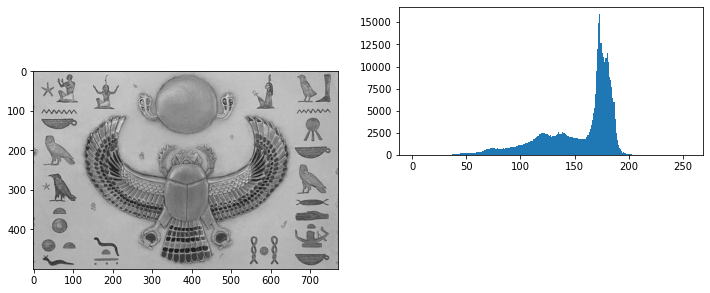

In [8]:
plt.figure(figsize=(12,6))
img = cv2.imread('testcv.jpg',0)
plt.subplot(121)
plt.imshow(img,cmap='gray')
plt.subplot(222)
plt.hist(img.ravel(),256,[0,256])
plt.show()

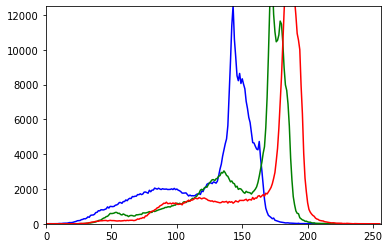

In [9]:
img = cv2.imread('testcv.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color=col)
    plt.xlim([0,256])
    plt.ylim([0,12500])
plt.show()

### 2. Using OpenCV

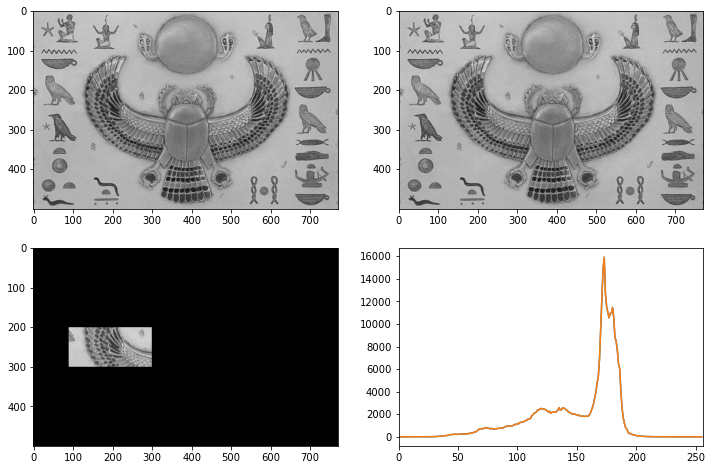

In [10]:
img = cv2.imread('testcv.jpg',0)

mask = np.zeros(img.shape[:2],np.uint8)
mask[200:300,90:300] = 255
masked_img = cv2.bitwise_and(img,img, mask=mask)

hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],None,[256],[0,256])

plt.figure(figsize=(12,8))
plt.subplot(221), plt.imshow(img,'gray')
plt.subplot(222), plt.imshow(img,'gray')
plt.subplot(223), plt.imshow(masked_img,'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])

plt.show()

## Histograms - 2: Histogram Equalization

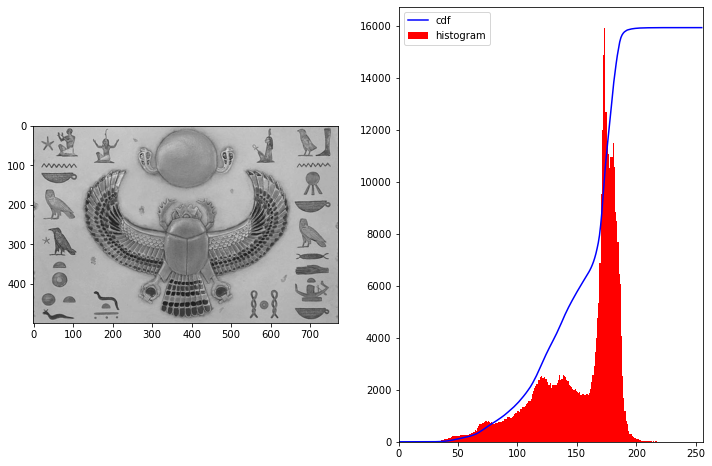

In [11]:
img = cv2.imread('testcv.jpg',0)

hist,bins = np.histogram(img.flatten(),256,[0,256])

plt.figure(figsize=(12,8))
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()
plt.subplot(1,2,1)
plt.imshow(img,'gray')
plt.subplot(1,2,2)
plt.plot(cdf_normalized,color='b')
plt.hist(img.flatten(),256,[0,256],color='r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc='upper left')
plt.show()

In [12]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

In [13]:
img2 = cdf[img]

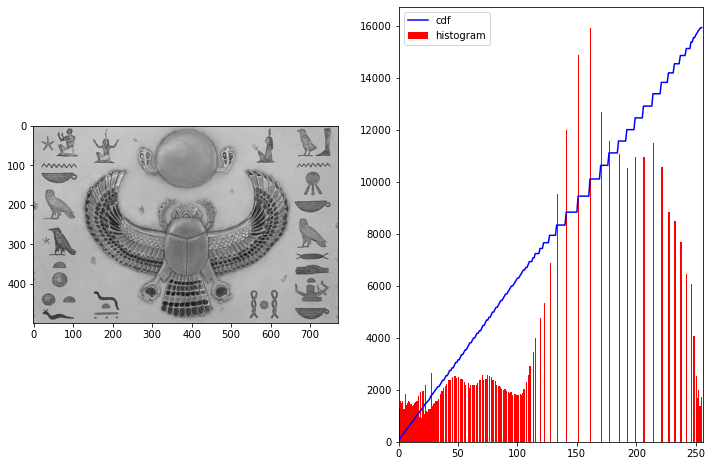

In [14]:
hist,bins = np.histogram(img2.flatten(),256,[0,256])

plt.figure(figsize=(12,8))
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()
plt.subplot(1,2,1)
plt.imshow(img,'gray')
plt.subplot(1,2,2)
plt.plot(cdf_normalized,color='b')
plt.hist(img2.flatten(),256,[0,256],color='r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc='upper left')
plt.show()